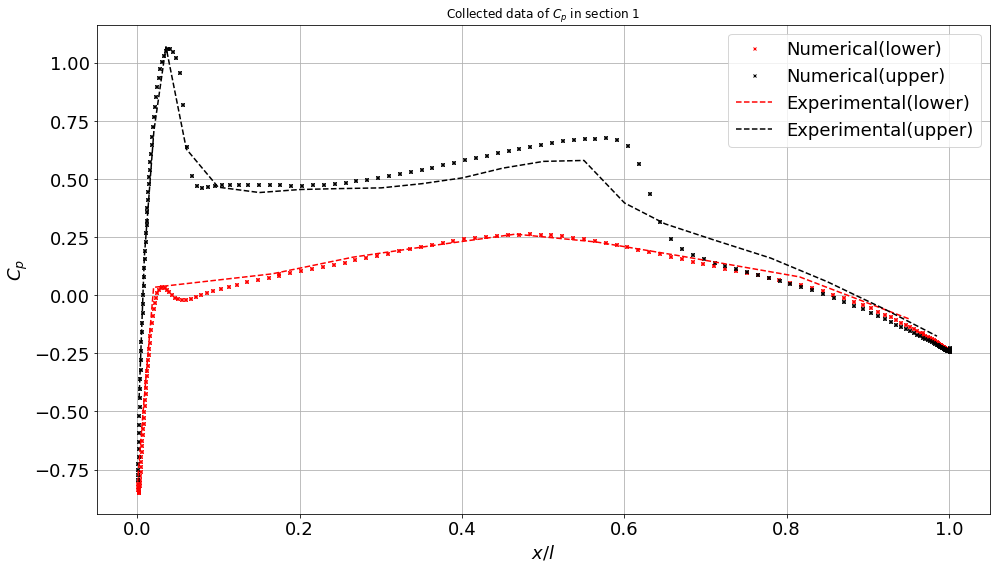

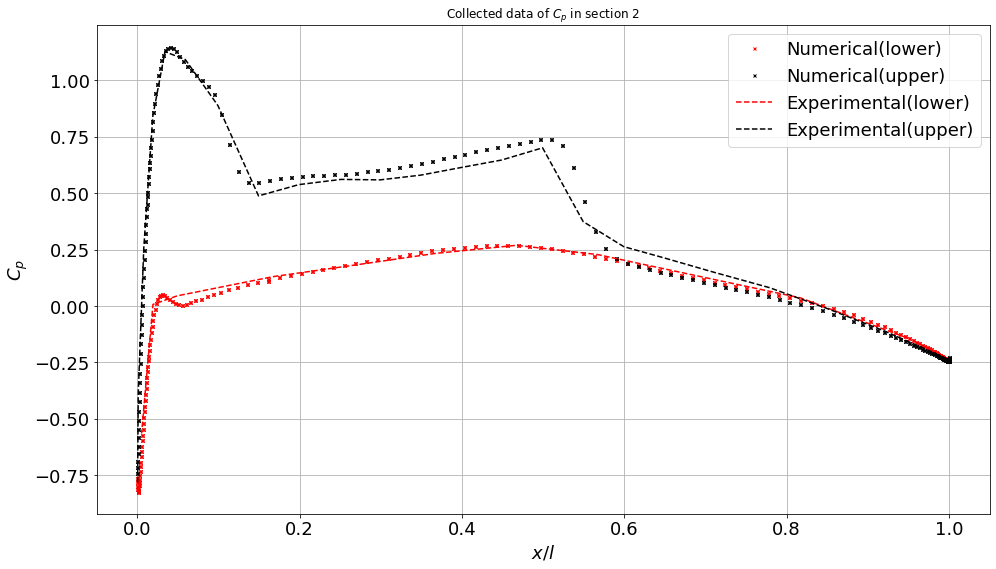

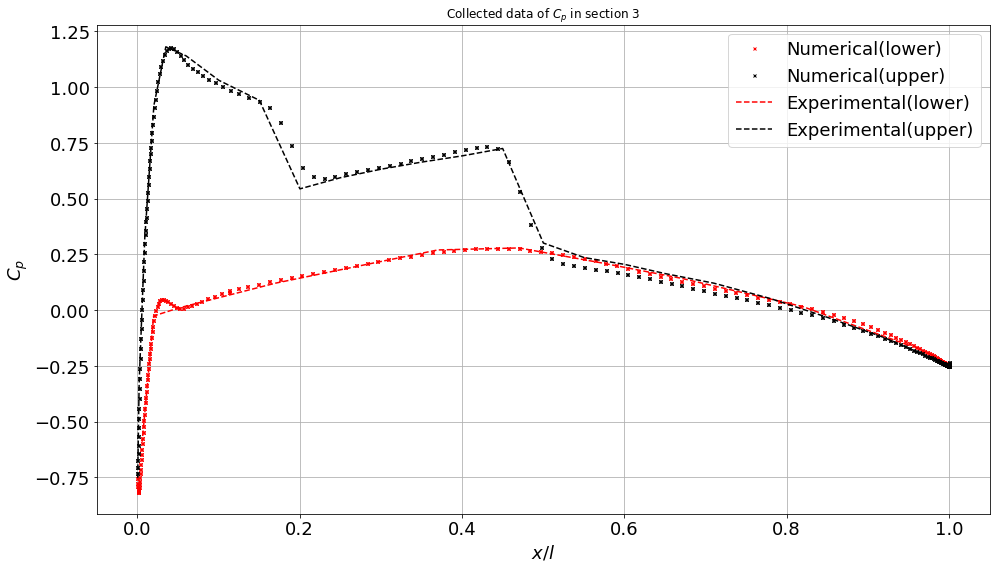

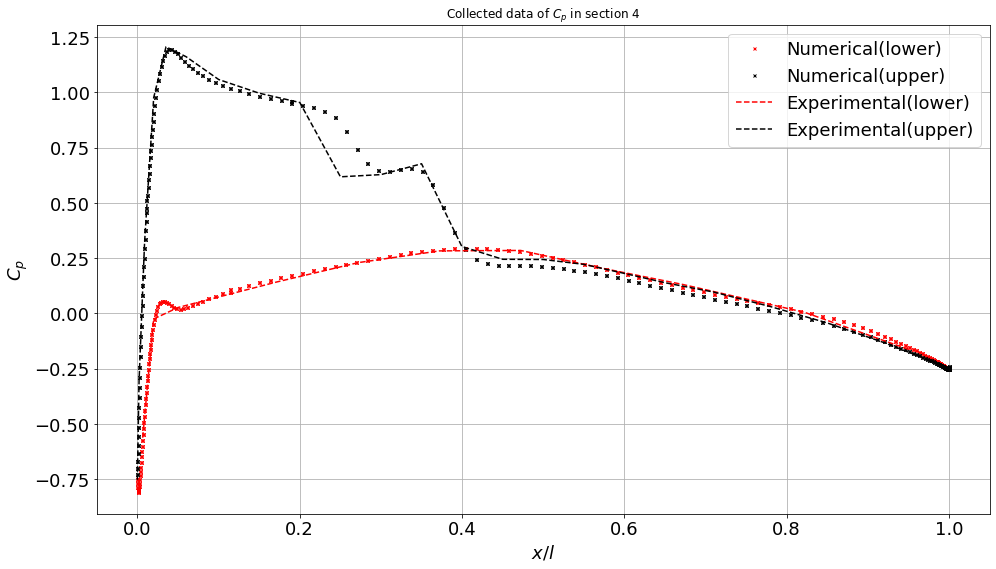

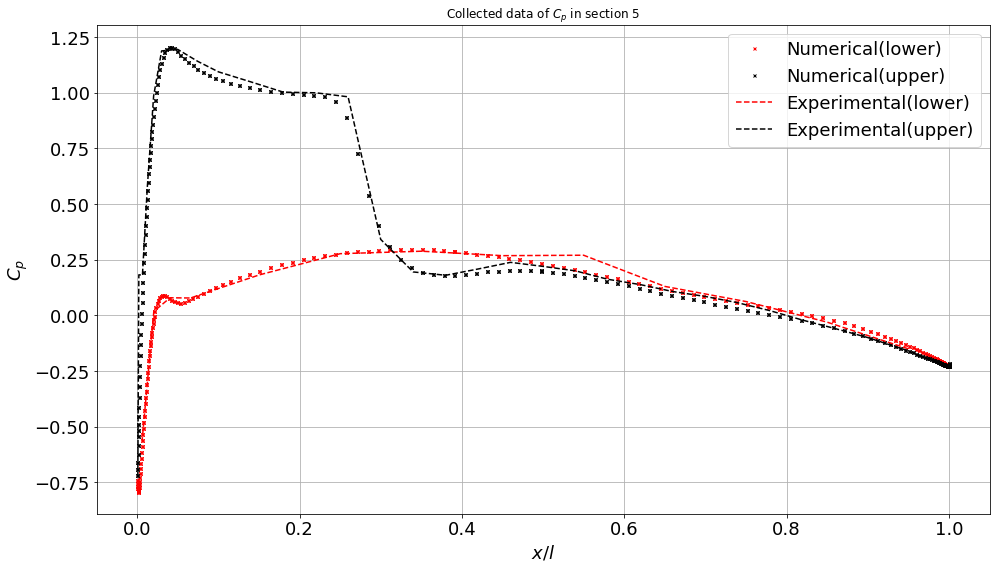

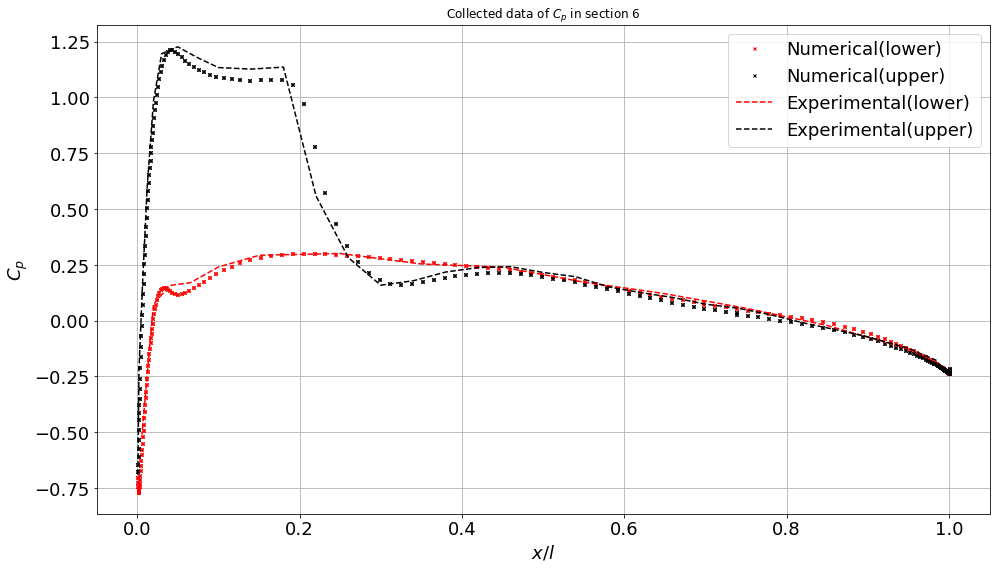

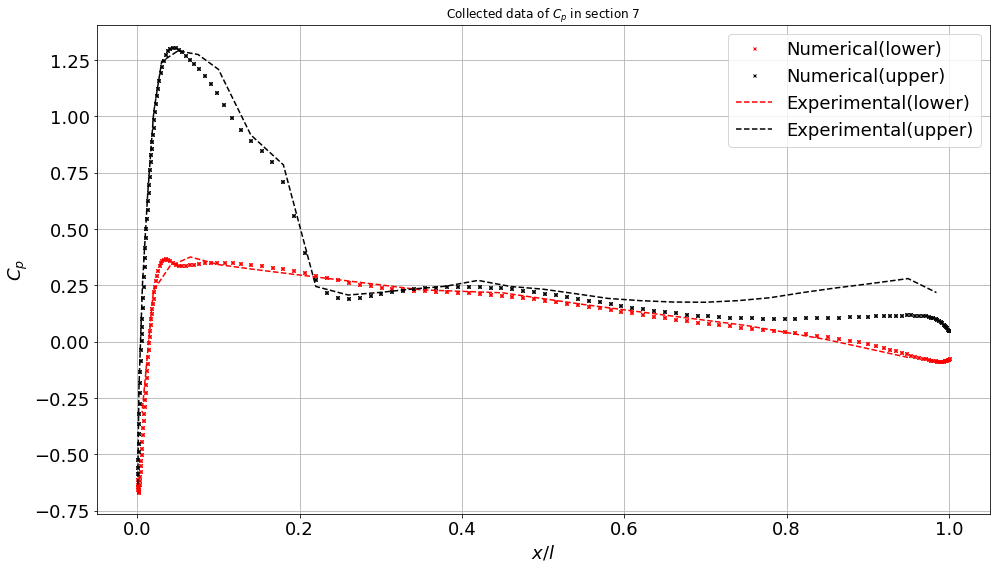

In [4]:
import tecplot as tp
import numpy as np
import matplotlib.pyplot as plt
import os

def getExtractedSlice(z, i) : 
    extractedSlice = tp.data.extract.extract_slice(
    origin = (0, 0.0, z[i] * 1.1963),
    normal = (0, 0, 1),
    source = tp.constant.SliceSource.SurfaceZones,
    dataset = dataSet)
    
    extractedSlice.name = 'z-slise-' + str(i+1)
    
    return extractedSlice

def loadExpData(i) : 
    lf = open(os.getcwd() + "\expData\cp" + str(i+1) + "l.txt", 'r')
    uf = open(os.getcwd() + "\expData\cp" + str(i+1) + "u.txt", 'r')
    
    xl = np.array([])
    xu = np.array([])
    fl = np.array([])
    fu = np.array([])
    for line in lf : 
        xl = np.append(xl, float(line.split()[0]))
        fl = np.append(fl, float(line.split()[1]))
    
    for line in uf : 
        xu = np.append(xu, float(line.split()[0]))
        fu = np.append(fu, float(line.split()[1]))
        
    lf.close()
    uf.close()
    
    return xl, xu, fl, fu

def drawGraph(xl, xu, fl, fu, xln, xun, fln, fun, i) : 
    fig = plt.figure(figsize = (16, 9))
    ax = fig.add_subplot(111)

    ax.plot(xln, fln, linestyle = 'None', color = 'red', marker = 'x', markersize = 3, label = 'Numerical(lower)')
    ax.plot(xun, fun, linestyle = 'None', color = 'black', marker = 'x', markersize = 3, label = 'Numerical(upper)')
    ax.plot(xl, fl, linestyle = '--', color = 'red', marker = 'None', label = 'Experimental(lower)')
    ax.plot(xu, fu, linestyle = '--', color = 'black', marker = 'None', label = 'Experimental(upper)')
    
    xax = ax.xaxis
    xlocs = xax.get_ticklocs()
    xlabels = xax.get_ticklabels()
    xlines = xax.get_ticklines()

    xax.grid(True)

    for label in xlabels :
        label.set_color('black')
        label.set_rotation(0)
        label.set_fontsize(18)
    
    yax = ax.yaxis
    ylocs = yax.get_ticklocs()
    ylabels = yax.get_ticklabels()
    ylines = yax.get_ticklines()
    yax.grid(True)

    for label in ylabels :
        label.set_color('black')
        label.set_rotation(0)
        label.set_fontsize(18)
    
    plt.xlabel(r'$x/l$', fontsize = 18)
    plt.ylabel(r'$C_p$', fontsize = 18)

    plt.legend(loc = 'best', fontsize = 18)
    plt.title("Collected data of " + r"$C_p$" + " in section " + str(i+1))
    os.chdir(os.getcwd() + "\outData")
    plt.savefig(str(i+1) + ".png")
    os.chdir(os.getcwd().replace("\outData", ""))
    plt.show()
    
def split(x, y, f) : 
    xl = np.array([])
    xu = np.array([])
    fl = np.array([])
    fu = np.array([])
    
    for i in range(np.size(y)) :
        if y[i] >= 0 :
            xu = np.append(xu, x[i])
            fu = np.append(fu, f[i])
        else : 
            xl = np.append(xl, x[i])
            fl = np.append(fl, f[i])
    
    
    return xl, xu, fl, fu

dataFile = os.getcwd() + "\onera_forces_bin.plt"
dataSet = tp.data.load_tecplot(dataFile)

frame = tp.active_frame()
frame.plot_type = tp.constant.PlotType.Cartesian3D
frame.plot().show_contour = True


z = np.array([0.20, 0.44, 0.65, 0.80, 0.90, 0.95, 0.99])

for i in range(7) : 
    extractedSlice = getExtractedSlice(z, i)
    
    xl, xu, fl, fu = loadExpData(i)
    
    x = extractedSlice.values('x').as_numpy_array()
    y = extractedSlice.values('y').as_numpy_array()
    xMax = np.max(x)
    xMin = np.min(x)
    x = (x - xMin) / (xMax - xMin)
    fnorm = extractedSlice.values('fnorm').as_numpy_array()
    fnorm = -2 * (fnorm - 97853.09900920992) / 97853.09900920992
    
    xln, xun, fln, fun = split(x, y, fnorm)
    
   
    drawGraph(xl, xu, fl, fu, xln, xun, fln, fun, i)
    
    
    


